**Моделирование Кольцевого Метро** 

**(Взято с стр. 201 http://www.mou.mipt.ru/gasnikov1129.pdf)**

## Постановка Задачи

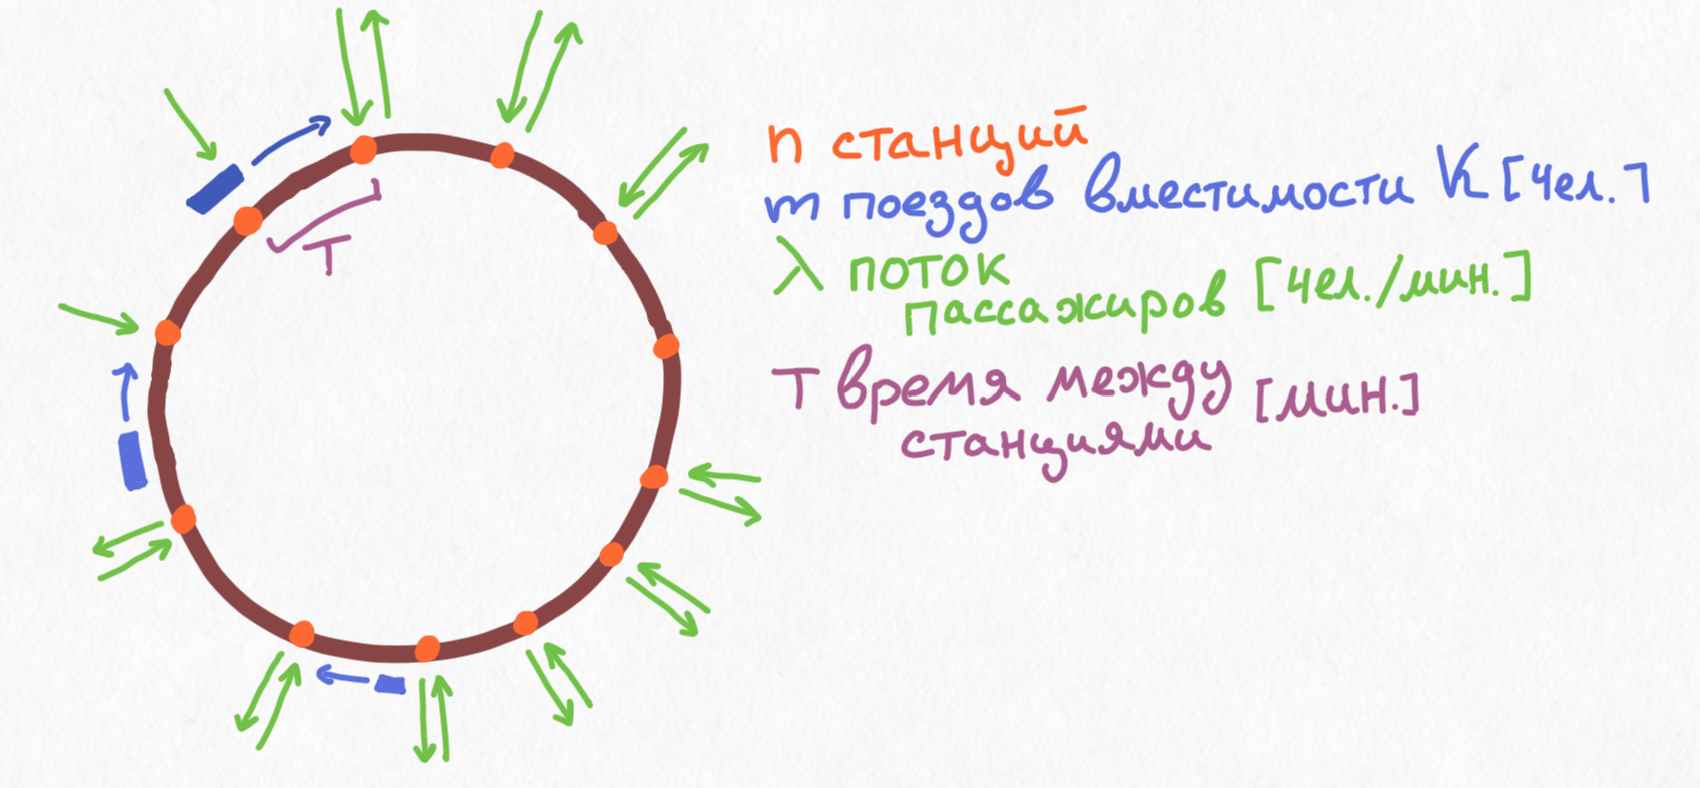

В некотором городе все $n = 15$ станций метро расположены на кольцевом маршруте. Непрекращающееся движение поездов
осуществляется в оба направления. Время, затрачиваемое поездом на
преодоление расстояния между любыми двумя соседними станциями,
фиксировано и равно $T = 5$ мин.
Время, требуемое на остановку, не
учитывается (пренебрежимо мало по сравнению с $T$). 
Всего на кольцевом
маршруте курсируют по $m$ поездов в каждом направлении с интервалом
движения, равным $ t = \frac{nT}{m} $. 
Потоки пассажиров, приходящих на каждую из
станций метро, описываются независимыми пуассоновскими процессами с фиксированной (одинаковой) интенсивностью $\lambda = 50$ чел/мин; для
простоты считаем интенсивность постоянной во времени в течение всего
рабочего дня (12 часов) и изо дня в день. В связи со свойствами пуассоновского процесса (теорема Григелиониса), такое описание вполне естественно
и часто используется в теории массового обслуживания. 
Предполагается, что конечная станция «выбирается» каждым пассажиром случайно
и равномерно среди $n − 1$ станций (направление движения выбирается по
принципу кратчайшего пути, если по обоим направлениям время в пути
одинаково, то направление выбирается случайно). Вместимость поездов
одинакова и равна $K = 600$ чел. Требуется определить «оптимальное»
число поездов, минимизирующий эффективные месячные траты:

$f(m) = 30 \omega h(m) + 2m\psi \rightarrow\min\limits_{m\in\mathbb{N}}$ 

где $\omega = 120$ руб./час - эффективная стоимость одного часа одного человека, $h(m)$ - суммарное время, потраченное пассажирами в течении дня, $\psi = 5 * 10^5$ руб./мес. - стоимость обслуживания одного поезда за месяц эксплуатации. 

## Простейшая Математическая Модель

Для аналитического решения пришлось упростить и без того простую модель.

Во-первых: пусть кол-во станций $n$ - нечетное. Это позволяет располовинить входящий поток, и учитывать движение только в одну сторону, что упрощает анализ.

Во-вторых: будем считать, что поток входящих пассажиров непрерывен, а система пришла в равновесие.

Введем вектор $\vec{b}$ - равновесное состояние загруженного поезда, пусть $\forall k\in 1\dots\lfloor\frac{n}{2}\rfloor\hookrightarrow[\vec{b}]_{k}$ - кол-во людей, которые выходят через k станций. Придя на станцию, из поезда выходит $[\vec{b}]_{1}$ людей, а заходит $\frac{n\lambda T}{2m}$. Так как конечная станция выбирается равномерно, то в равновесном случае получаем, что $\forall k \in 1\dots\lfloor\frac{n}{2}\rfloor - 1\hookrightarrow [\vec{b}]_{k} = [\vec{b}]_{k + 1} + \frac{n\lambda T}{2m\lfloor\frac{n}{2}\rfloor}$, а людей, которые едут на другой конец кольца $[\vec{b}]_{\lfloor\frac{n}{2}\rfloor} = \frac{n\lambda T}{2m\lfloor\frac{n}{2}\rfloor}$.

Получается, что в одном поезде находится $K_{real} = \frac{n\lambda T}{4m}(\lfloor\frac{n}{2}\rfloor + 1)$ человек, что в равновесном режиме должно быть ниже максимальной вместимости поезда $K = 600$ человек, что дает нам оценку $m_{min} = 12.5$ минимального кол-ва поездов, кри котором еще не наступает коллапса, и система может работать в равновесном стационарном режиме. Суммарно, во всех поездах одновременно находится $\frac{\lambda T}{4}n(\lfloor\frac{n}{2}\rfloor + 1)$ человек. 

Теперь оценим среднее кол-во людей на станциях. Раз поезда приходят раз в $t = \frac{nT}{m}$, то в среднем на странции находится $\frac{1}{t}\int\limits_{0}^{t}d\tau\frac{\lambda\tau}{2} = \frac{n\lambda T}{4m}$.

Получается, суммарное кол-во людей в метро в стационарном случае равно $\frac{n\lambda T}{4}\left((\lfloor\frac{n}{2}\rfloor + 1) + \frac{n}{m}\right)$.

## Численная Симуляция

Для получения численных оценок будем использовать имитационную симуляцию: создадим $n$ станций метро, $m$ поездов и будем перевозить пассажиров со станции на станцию. Для симуляции времени расстояние между двумя соседними станциями разделено на $m$ кусков. Каждый ход занимает $t = \frac{T}{m}$ времени, за которое на станцию прибывает $P(\lambda t)$ человек. Затем все поезда делают по тоннелю 1 шаг вперед, а те поезда, которые оказались на станции выгружают и загружают пассажиров. Для дальнейшего анализа кол-во вошедших(A) и вышедших(D) пассажиров записывалось. По полученным данным строился график.

### Реализация

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class Train:
    def __init__(self, station_number: int):
        self.passenger_goals = np.zeros(station_number)
        self.station_number = station_number
        
    def get_amount(self):
        return sum(self.passenger_goals)
    
    def output_step(self, station_id: int):
        new_people = self.passenger_goals[station_id]
        self.passenger_goals[station_id] = 0
        return new_people
        
    def input_step(self, station_id: int, new_passenger_number: int):
        for _ in range(new_passenger_number):
            goal_id = (station_id + np.random.randint(self.station_number // 2) + 1) % self.station_number
            self.passenger_goals[goal_id] += 1

In [ ]:
class Station:
    def __init__(self, passenger_flow: float):
        self.passenger_flow = passenger_flow
        self.passenger_number = 0
    
    def input_step(self, delta_t: float):
        new_people = np.random.poisson(lam = self.passenger_flow * delta_t)
        self.passenger_number += new_people
        return new_people
        
    def output_step(self, new_passenger_number: int):
        self.passenger_number -= new_passenger_number
        
    def get_amount(self):
        return self.passenger_number

In [ ]:
class Trafic:
    def __init__(self, m : int = 4):
        self.n = 15    # station number
        self.m = m    # train number
        self.T = 5    # time between stations
        self.lam = 50 / 2 # passenger flow
        self.K = 600  # passenger capacity
        
        a = -1 * np.ones(self.n * self.m)
        for i in range(self.n):
            a[i * self.m] = i
        self.adress = np.array([np.roll(a, -1 * self.n * j) for j in range(self.m)]) # station adresses
        
        self.stations = [Station(self.lam) for _ in range(self.n)]
        self.trains = [Train(self.n) for _ in range(self.m)]
        
        self.input_ = 0
        self.output_ = 0
        
    def step(self):
        delta_t = self.T / self.m
        # пассажиры приходят на станцию
        for station in self.stations: 
            self.input_ += int(station.input_step(delta_t))
            
        # поезда делают шаг по кольцу
        self.adress = np.roll(self.adress, -1, axis = -1)
        
        # те поезда, которые оказались на станции выгружают и загружают людей
        for train_id in range(self.m):
            station_id = int(self.adress[train_id,0])
            if(station_id != -1):
                self.output_ += int(self.trains[train_id].output_step(station_id))
                new_passengers = int(min(self.K - self.trains[train_id].get_amount(), self.stations[station_id].get_amount()))
                self.trains[train_id].input_step(station_id, new_passengers)
                self.stations[station_id].output_step(new_passengers)
    
    def get_input(self):
        return self.input
    
    def get_output(self):
        return self.output

In [ ]:
def spended_time(m: int): # человеко-часы, потраченные в метро за 12 часов
    n = 15
    trafic = Trafic(m = m)

    N = int(12 * 60 * m / trafic.T)
    input_ = []
    output_ = []
    for _ in range(N):
        trafic.step()
        input_.append(trafic.input_)
        output_.append(trafic.output_)
        
    return int(sum(np.array(input_) - np.array(output_))  * (trafic.T / m / 60))

### Результаты Симуляции

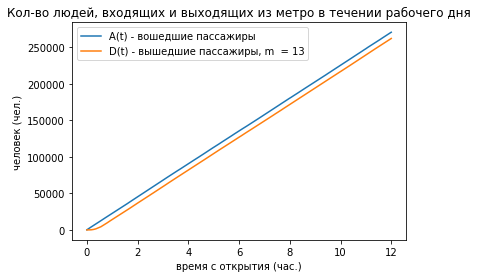

In [ ]:
n = 15
m = 13

trafic = Trafic(m = m)

N = int(12 * 60 * m / trafic.T)
input_ = []
output_ = []

for _ in range(N):
    trafic.step()
    input_.append(trafic.input_)
    output_.append(trafic.output_)
    
fig, ax = plt.subplots()
ax.plot(np.array(range(N)) * (trafic.T / m / 60), input_, label = 'A(t) - вошедшие пассажиры')
ax.plot(np.array(range(N)) * (trafic.T / m / 60), output_, label = 'D(t) - вышедшие пассажиры, m  = ' + str(m))

ax.set_title('Кол-во людей, входящих и выходящих из метро в течении рабочего дня')
ax.set_xlabel('время с открытия (час.)')
ax.set_ylabel('человек (чел.)')
ax.legend()

plt.show()

## Сравнение Симуляции и Математической Модели

### Критическое кол-во Поездов и Коллапс

По предсказаниям математической модели, в случае, если кол-во поездов $m \leq m_{min}$, должен начаться коллапс. В случае ограниченного рабочего и фиксированного потока пассажиров, коллапс выражается в взрывном росте потраченных человеко часов. 

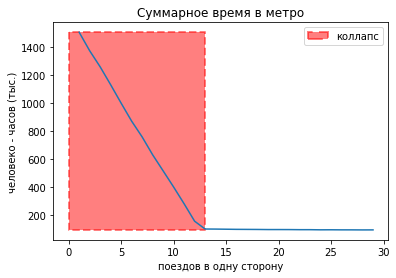

In [ ]:
W = []
for m in range(1,30):
    W.append(spended_time(m))

fig, ax = plt.subplots()
ax.plot(range(1,30), np.array(W)/1000)

x = np.linspace(0, 13, 10)
y1 = np.linspace((np.array(W)/1000).min(), (np.array(W)/1000).min(), 10)
y2 = np.linspace((np.array(W)/1000).max(), (np.array(W)/1000).max(), 10)
ax.fill_between(x, y1, y2,
                facecolor='r',
                alpha = 0.5,
                color = 'red',
                linewidth = 2,
                linestyle = '--',
                label = 'коллапс')

ax.set_title('Суммарное время в метро')
ax.set_xlabel('поездов в одну сторону')
ax.set_ylabel('человеко - часов (тыс.)')

ax.legend()
plt.show()

### Эффективный Бюджет Кольцевого Метро 

В случае математической модели, эфеективный бюджет описывается как $f_{mat} = 30×12×\omega\frac{\lambda T (\lfloor\frac{n}{2}\rfloor + 1) n}{4}\left(1 + \frac{n\,/\,{(\lfloor\frac{n}{2}\rfloor + 1)}}{m}\right) + 2\psi m$. 

Подставив числа из условия задачи, получаем $f_{mat}(m) = \varkappa × (1 + \frac{1.875}{m}) + m$ млн.руб., где $\varkappa = 648$.
Внезапно, но несмотря на простоту математической модели, она достаточно хорошо совпадает с результатами симуляции. Если же "подкрутить" параметр $\varkappa$ на $2\%$ то модель буквально совпадает с симуляцией. Подобный результат можно объяснить тем, что из-за случайного момента прихода люди в среднем ждут поезд меньше, чем в случае непрерывного потока. 

In [ ]:
S = []
for m in range(13,100):
    S.append(2 * 120 * spended_time(m) * 30 + 2 * 5 * 100000 * m)

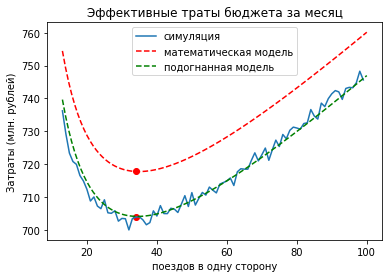

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(13,100), np.array(S)/1000000, label = 'симуляция')

x = np.linspace(13, 100, 100)
y = 2 * ((15 * 50 * 5 * 8 / 4) * 120 * 12 * 30 / 10 ** 6) * (1 + 1.875 / x) + x
y_podgon = 0.98 * 2 * ((15 * 50 * 5 * 8 / 4) * 120 * 12 * 30 / 10 ** 6) * (1 + 1.875 / x) + x
x_opt = int(np.sqrt(1.875 * 2 * ((15 * 50 * 5 * 8 / 4) * 120 * 12 * 30 / 10 ** 6)))
y_opt = 2 * ((15 * 50 * 5 * 8 / 4) * 120 * 12 * 30 / 10 ** 6) * (1 + 1.875 / x_opt) + x_opt

ax.plot(x, y, c = 'red', linestyle = '--', label = 'математическая модель')
ax.plot(x, y_podgon, c = 'green', linestyle = '--', label = 'подогнанная модель')
ax.scatter(x_opt, S[x_opt - 13]/1000000, c = 'red')
ax.scatter(x_opt, y_opt, c = 'red')
ax.set_title('Эффективные траты бюджета за месяц')
ax.set_xlabel('поездов в одну сторону')
ax.set_ylabel('Затраты (млн. рублей)')

ax.legend()
plt.show()